In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [58]:
class Spring():
    def __init__(self, k: float=1):
        self.__k = k
    
    def get_k(self):
        return self.__k
    
    def __set_k(self, k):
        self.__k = k
    
    def move(self, t0: float, dt: float, x0: float, v0: float=0, t1: float=None, m: float=1, plot: bool=False):
        omega = math.sqrt(self.__k / m)
        A = x0
        B = v0 / omega
        
        if t1 is None:
            t1 = t0 + 1000 * dt
            
        def __move(A, B, omega, t):
            return A*math.cos(omega*t) + B*math.sin(omega*t)
        
        x = []
        times = np.arange(t0, t1, dt, dtype=float)
        for t in times:
            x.append(__move(A, B, omega, t))
            
        if plot:
            fig = plt.figure(figsize=(4, 10))
            plt.plot(x, times)
            
        return x
    
    def inSeries(self, that):
        k1 = self.__k
        k2 = that.get_k()
        new_k = 1 / ((1/k1) + (1/k2))
        
        return Spring(new_k)
    
    def inParallel(self, that):
        k1 = self.__k
        k2 = that.get_k()
        new_k = k1 + k2
        
        return Spring(new_k)
    
    
class SpringArray():
    def equivalentSpring(self, springExpr: str, springs: list=None):
        stack = []
        for i in springExpr:
            if i in '[{':
                stack.append(i)
            elif i == ']':
                subsprings = []
                j = stack.pop()
                
                while j != '[':
                    subsprings.append(j)
                    j = stack.pop()
                    
                if subsprings:
                    resulting_spring = subsprings.pop(0)
                    if subsprings:
                        for spring in subsprings:
                            resulting_spring = resulting_spring.inParallel(spring)
                else:
                    if springs is not None:
                        try:
                            resulting_spring = springs.pop(0)
                        except Exception as e:
                            raise ValueError('Not enough Springs were passed.')
                    else:
                        resulting_spring = Spring()
                    
                stack.append(resulting_spring)
            elif i == '}':
                subsprings = []
                j = stack.pop()
                resulting_spring = None
                
                while j != '{':
                    subsprings.append(j)
                    j = stack.pop()
                    
                if subsprings:
                    resulting_spring = subsprings.pop(0)
                    if subsprings:
                        for spring in subsprings:
                            resulting_spring = resulting_spring.inSeries(spring)
                else:
                    if springs is not None:
                        try:
                            resulting_spring = springs.pop(0)
                        except Exception as e:
                            raise ValueError('Not enough Springs were passed.')
                if resulting_spring:    
                    stack.append(resulting_spring)
                
        resulting_spring = stack.pop()
        
        if stack:
            raise ValueError('Unbalanced expression was passed! Please pass a correct spring expression.')
            
        return resulting_spring   

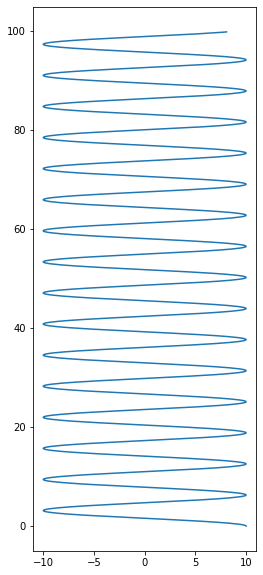

In [18]:
s = Spring()
x = s.move(0, 0.1, 10, plot=True)

In [59]:
sa = SpringArray()
sa.equivalentSpring('{[[[]][]][{[]}{}]}')